<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/FashionMNISTProject_v1_Answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage" />
</a>


<h1>Fashion-MNIST Project </h1>


<h2>Table of Contents</h2>


<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</a></li>
<li><a href="#Q2">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>


</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<a name="Preparation"><h2 id="Preparation" >Preparation</h2></a>


Download the datasets you needed for this lab.


The following are the PyTorch modules you are going to need


In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules


In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<hr>


<hr>


<a name="Q1"><h2 id="Q1">Questions 1: Create a Dataset Class</h2></a>


In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function to perform the following transforms:.
<ol>
    <li>Use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>Use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

You will then take a screen shot of your validation data.


Use the Compose function to compose the transforms


In [5]:
#Hint:

IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

<hr>


Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.


<b>Hint:</b>
<code>dsets.FashionMNIST(root= '.fashion/data', train=???, transform=composed,  download=True)</code>


In [6]:
# Enter your code here

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.2MB/s]


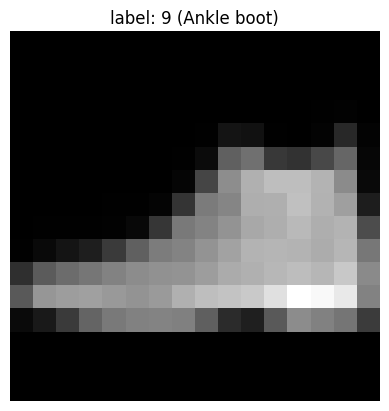

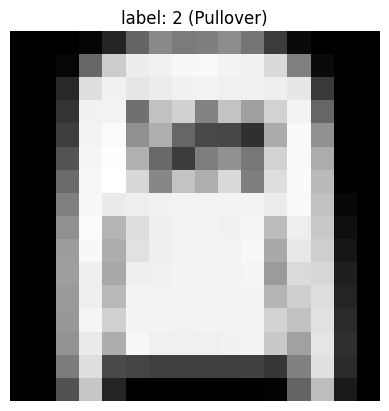

In [1]:
# imports
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 1) transforms: Resize -> ToTensor
IMAGE_SIZE = 16
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),             # grayscale -> tensor [1, H, W] in [0,1]
])

# 2) datasets: train & validation (FashionMNIST)
dataset_train = datasets.FashionMNIST(
    root="./fashion/data", train=True, transform=composed, download=True
)
dataset_val = datasets.FashionMNIST(
    root="./fashion/data", train=False, transform=composed, download=True
)

# (optional) class names to display
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# 3) define show_data() used below
def show_data(sample):
    img, label = sample             # img: torch.Size([1, H, W]) for FashionMNIST
    # squeeze channel for grayscale display
    if img.ndim == 3 and img.size(0) == 1:
        img = img.squeeze(0)
        cmap = "gray"
    else:
        # (for RGB datasets)
        img = img.permute(1, 2, 0)
        cmap = None
    plt.imshow(img, cmap=cmap)
    plt.title(f"label: {label} ({class_names[label]})")
    plt.axis("off")

# 4) preview two samples from validation set (as your cell intends)
for n, data_sample in enumerate(dataset_val):
    show_data(data_sample)
    plt.show()
    if n == 1:   # show first 2
        break


In [9]:
# Define the Dataset class and apply necessary transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torchvision.datasets as dsets

# Define transforms: Resize and Convert to Tensor
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize image
    transforms.ToTensor()         # Convert to Tensor
])

# Load FashionMNIST dataset
dataset_train = dsets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
dataset_val = dsets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader for batch processing
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

print("✔️ Dataset loaded with transforms: Resize and ToTensor")


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]


✔️ Dataset loaded with transforms: Resize and ToTensor


<a name="Q2"><h2 id="Q2">Questions 2</h2></a>
Create a Convolutional Neural Network class using ONE of the following constructors.  Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.


Constructor  using Batch Norm


In [10]:
class CNN_batch(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network


In [11]:
class CNN(nn.Module):

    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader


In [12]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object


In [13]:
#model = CNN(out_1=16, out_2=32,number_of_classes=10)
#model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

Create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss


In [14]:
# Enter your code here

In [15]:
import torch.nn as nn
import torch

# Create a Convolutional Neural Network class with Batch Normalization
class CNN_batch(nn.Module):
    # Constructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction (Forward Pass)
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.bn_fc1(x)  # Apply Batch Normalization to fully connected layer

        return x

# Instantiate the model
model = CNN_batch()

print("✔️ CNN model with Batch Normalization created.")


✔️ CNN model with Batch Normalization created.


Code used to train the model


In [16]:
class CNN_batch(nn.Module):
    # Constructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Debugging: Calculate size after convolutions and poolings
        # After 2 max-pooling operations, the image size will be reduced by a factor of 4
        # from 64x64 → 16x16
        self.fc1 = nn.Linear(out_2 * 16 * 16, number_of_classes)  # 32 channels, 16x16 feature map
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction (Forward Pass)
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)

        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)

        print(f"Shape before flattening: {x.shape}")  # Debugging the shape before flattening
        x = x.view(x.size(0), -1)  # Flatten the tensor
        print(f"Shape after flattening: {x.shape}")  # Debugging the shape after flattening
        x = self.fc1(x)
        x = self.bn_fc1(x)  # Apply Batch Normalization to fully connected layer

        return x


You will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively.


NameError: name 'cost_list' is not defined

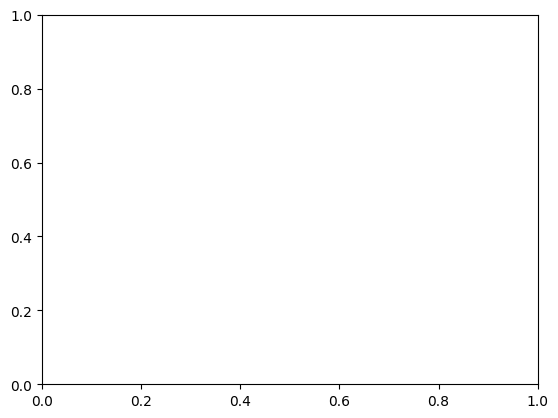

In [17]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Epoch 1: Loss = 0.5208, Accuracy = 0.8350
Epoch 2: Loss = 0.3902, Accuracy = 0.8540
Epoch 3: Loss = 0.3572, Accuracy = 0.8599
Epoch 4: Loss = 0.3393, Accuracy = 0.8643
Epoch 5: Loss = 0.3245, Accuracy = 0.8692


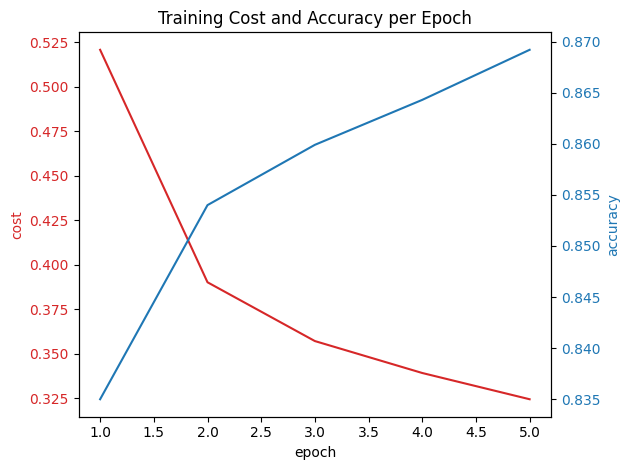

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Adjust model input size to match 64x64 = 4096
model = nn.Sequential(
    nn.Linear(64*64, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

# Set training parameters
epochs = 5
learning_rate = 0.003
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Initialize lists to store cost and accuracy
cost_list = []
accuracy_list = []

# Training loop
for epoch in range(epochs):
    running_loss = 0
    model.train()
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)  # Flatten 64x64 = 4096
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    cost_list.append(avg_loss)

    # Evaluation
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)  # Flatten 64x64
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    accuracy_list.append(accuracy)

    print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Accuracy = {accuracy:.4f}")

# Plotting cost and accuracy
epoch_range = list(range(1, len(cost_list) + 1))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost', color=color)
ax1.plot(epoch_range, cost_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(epoch_range, accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Training Cost and Accuracy per Epoch")
fig.tight_layout()
plt.show()


dataset: https://github.com/zalandoresearch/fashion-mnist


<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>


<hr>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
